### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. experimental import enable_iterative_imputer 
from sklearn. impute import IterativeImputer
from sklearn.model_selection import train_test_split

### ANALYSING THE DATASET

In [ ]:
#Creating a train dataframe to train our model and perform exploratory data analysis
train_df = pd.read_csv('/content/Loan_train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#Finding the size of the training dataset
train_df.shape

(614, 13)

Exploratory Data Analysis

In [ ]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
train_df['Loan_Status'].value_counts(normalize=True) 

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

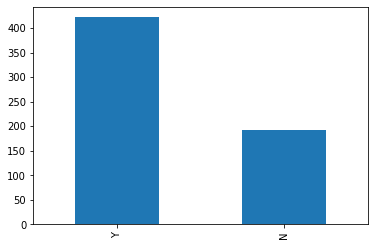

In [ ]:
#422 loans were apporved out of 614
train_df['Loan_Status'].value_counts().plot.bar()

As we can see, most loans were approved. The ratio for approved loans to denied loans is 2:1

#Univariate Analysis

Categorical Variable Analysis

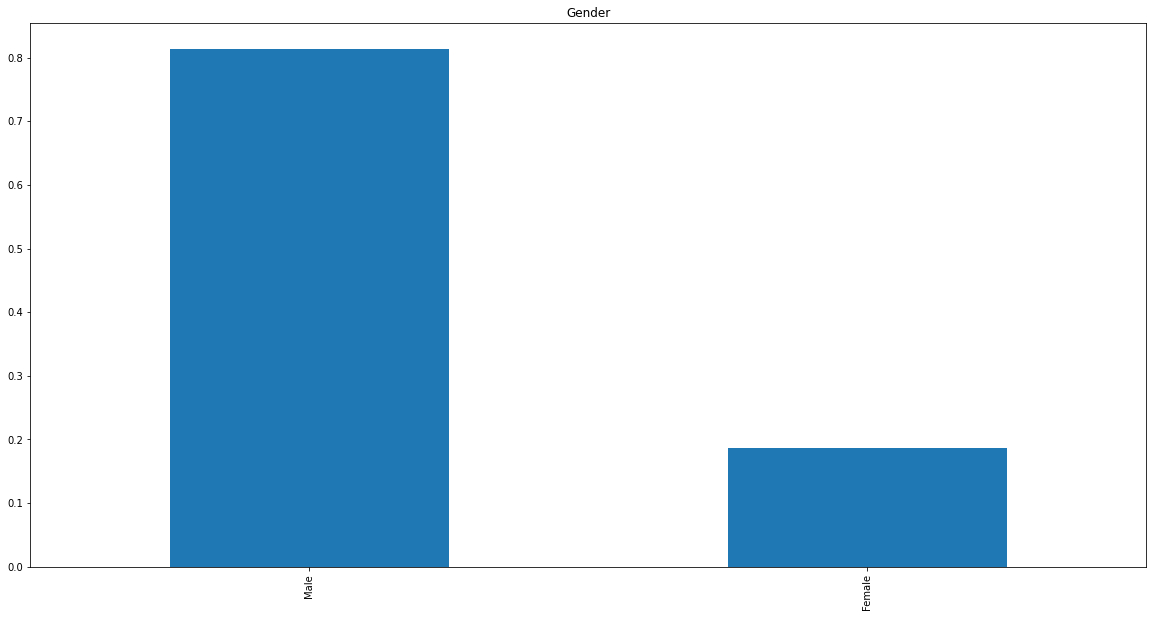

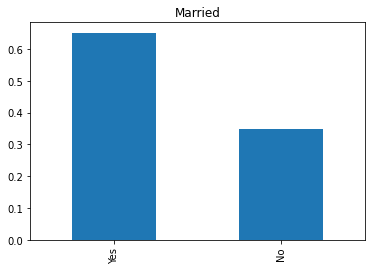

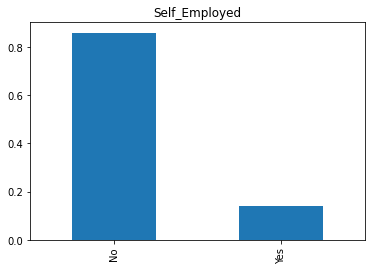

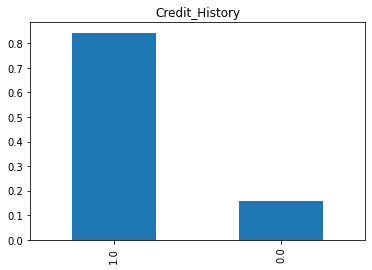

In [ ]:
#Plotting bar plots to analyse the distribution of each variable
train_df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.show()
train_df['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train_df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train_df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

Independent Variable (Ordinal)

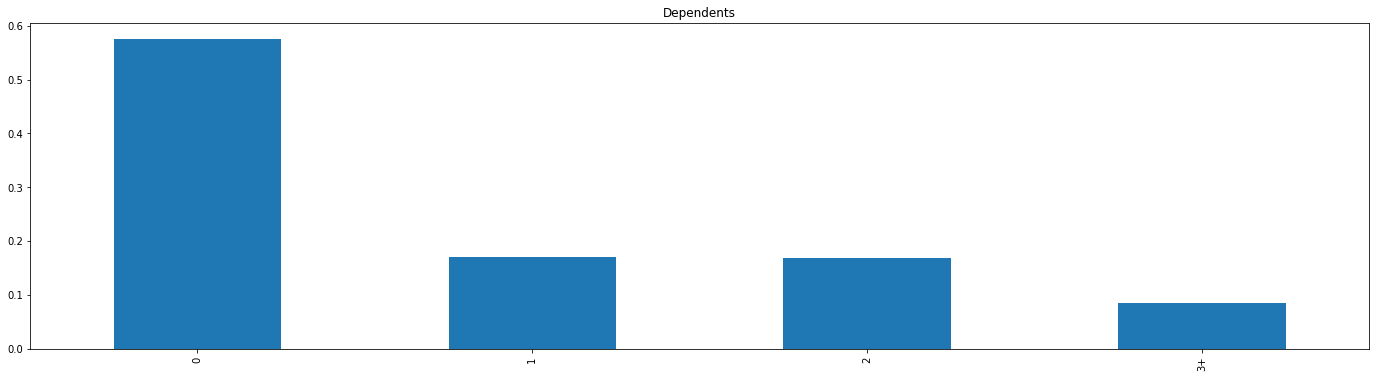

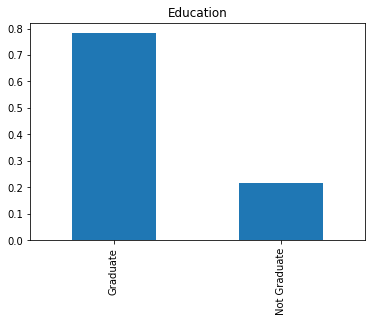

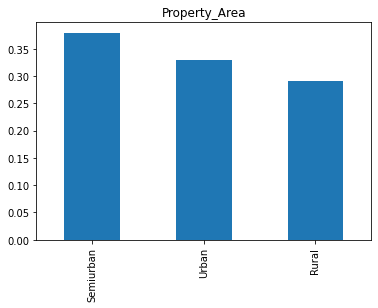

In [ ]:
#We want to figure out the distribution of the variables. We want to make sure that defferent categories are evenly distributed
train_df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()
train_df['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train_df['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

Independent Variable (Numerical)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


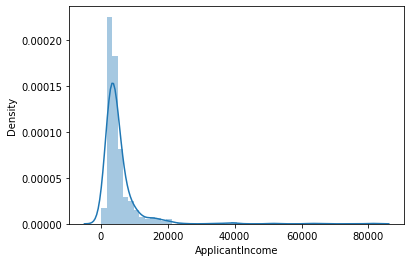

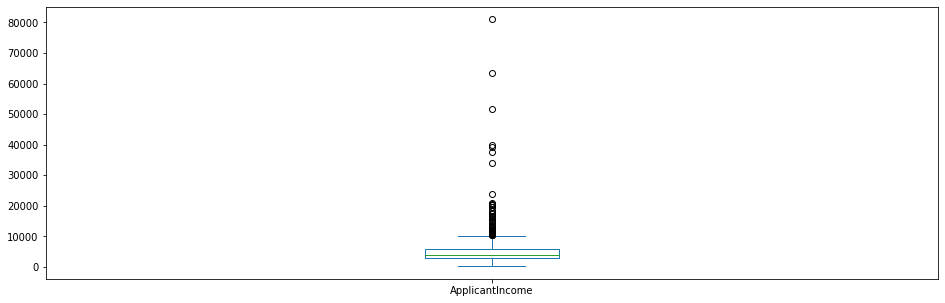

In [ ]:
#Analysing the sumerical variable and finding the distribution
sns.distplot(train_df['ApplicantIncome'])
plt.show()
train_df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Data distribution of applicant income is right skewed. Also confirms the presence of a lot of outliers with a higher income

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

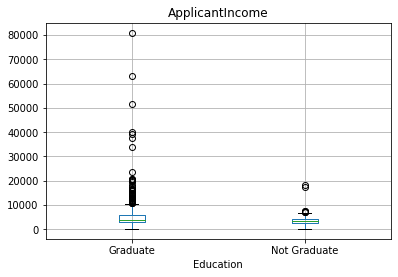

In [ ]:
#Finding the distribution of Income based on their education
train_df.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

We notice that the Income is on average higher for people who have graduated

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


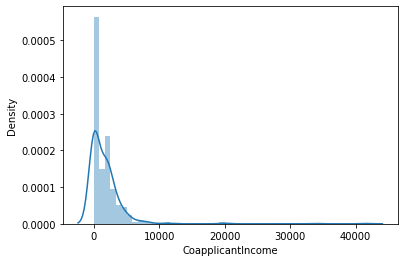

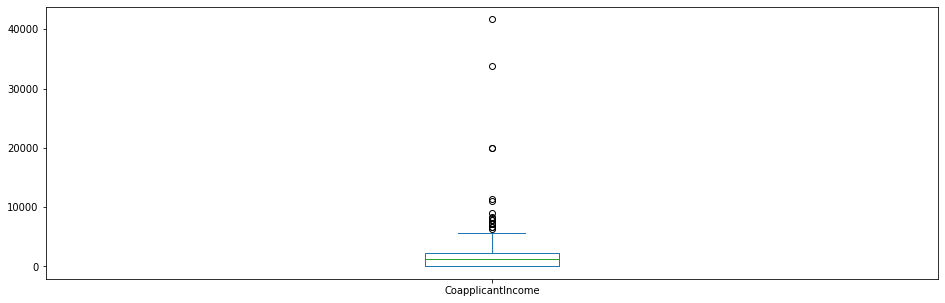

In [ ]:
#co-applicant income distribution
sns.distplot(train_df['CoapplicantIncome'])
plt.show()
train_df['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


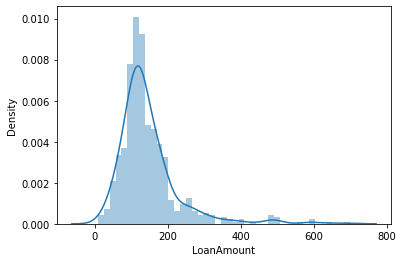

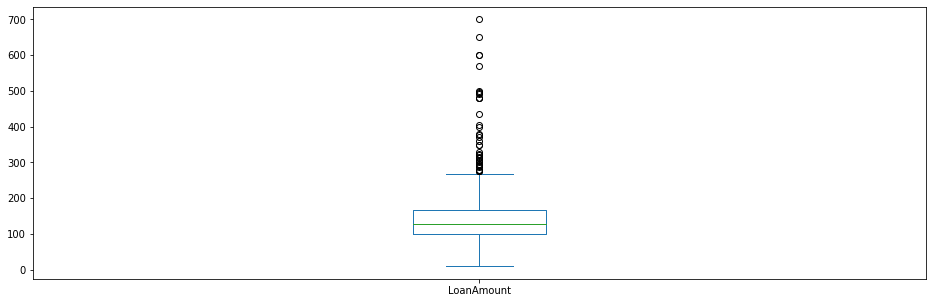

In [ ]:
#Finding the loan amounts for people 
train_df.notna()
sns.distplot(train_df['LoanAmount'])
plt.show()
train_df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

The loan amounts is somewhat normally distributed with a right skew. People take loan amounts for mostly for less that $200K

#Bivariate Analysis

categorical variables vs target variable

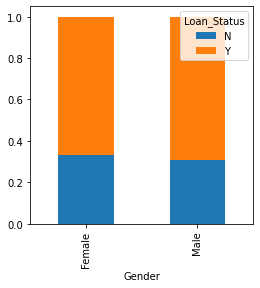

In [ ]:
#shows the proportion of male and female applicants for approved and unapproved loaans
Gender=pd.crosstab(train_df['Gender'],train_df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()


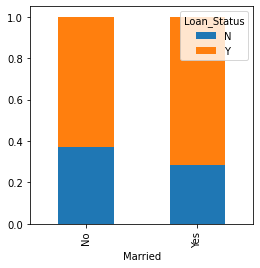

In [ ]:
#shows the proportion of married and single applicants for approved and unapproved loans
Married=pd.crosstab(train_df['Married'],train_df['Loan_Status'])
Dependents=pd.crosstab(train_df['Dependents'],train_df['Loan_Status'])
Education=pd.crosstab(train_df['Education'],train_df['Loan_Status'])
Self_Employed=pd.crosstab(train_df['Self_Employed'],train_df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()


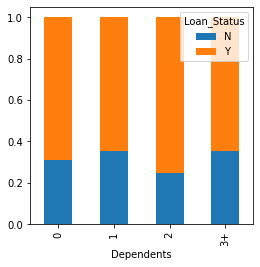

In [ ]:
#shows the distribution of applicants with 0 to 3+ dependents with the percentage rate of loan approvals and unapprovals
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()


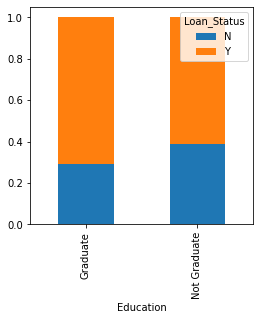

In [ ]:
#shows the propotion of graduate and non graduate rate of approvals and unapprovals
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()


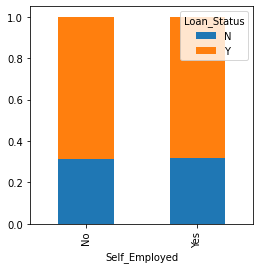

In [ ]:
#shows the proportion of self employed vs non self employed applicants percentage rate of approvals and non approvals
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()


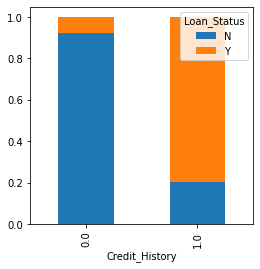

In [ ]:
#shows the percentages of loan approvals based on credit history
Credit_History=pd.crosstab(train_df['Credit_History'],train_df['Loan_Status'])
Property_Area=pd.crosstab(train_df['Property_Area'],train_df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()


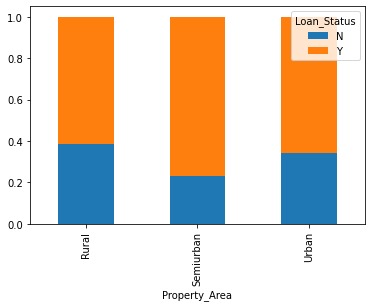

In [ ]:
#shows the proportion of loans getting approved in rural, semiurban and urban areas
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

Numerical Independent Variable vs Target Variable

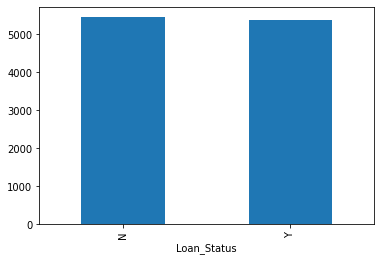

In [ ]:
#mean income for approved vs unapproved applicants
train_df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

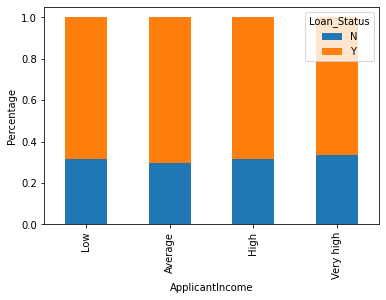

In [ ]:
#make bins for the applicant income variable based on the values in it
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train_df['Income_bin']=pd.cut(train_df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train_df['Income_bin'],train_df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

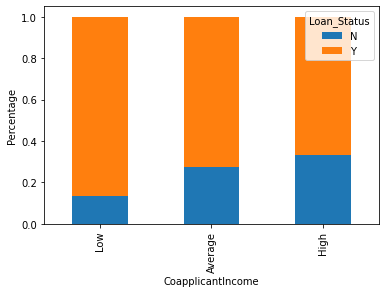

In [ ]:
#shows the percentage of loans approved based on co-applicant's income
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train_df['Coapplicant_Income_bin']=pd.cut(train_df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train_df['Coapplicant_Income_bin'],train_df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

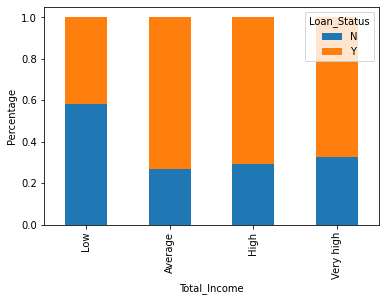

In [ ]:
#combining the applicant's income with the co-applicant's income to see the effect of total income on loan status
train_df['Total_Income']=train_df['ApplicantIncome']+train_df['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train_df['Total_Income_bin']=pd.cut(train_df['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train_df['Total_Income_bin'],train_df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

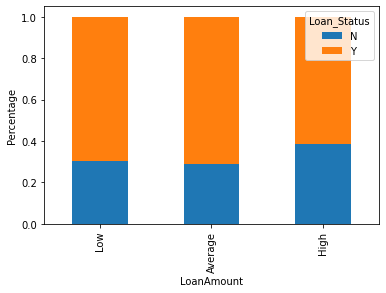

In [ ]:
#proportion of approved and unapproved loans based 
bins=[0,100,200,700]
group=['Low','Average','High']
train_df['LoanAmount_bin']=pd.cut(train_df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train_df['LoanAmount_bin'],train_df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

<function matplotlib.pyplot.show(*args, **kw)>

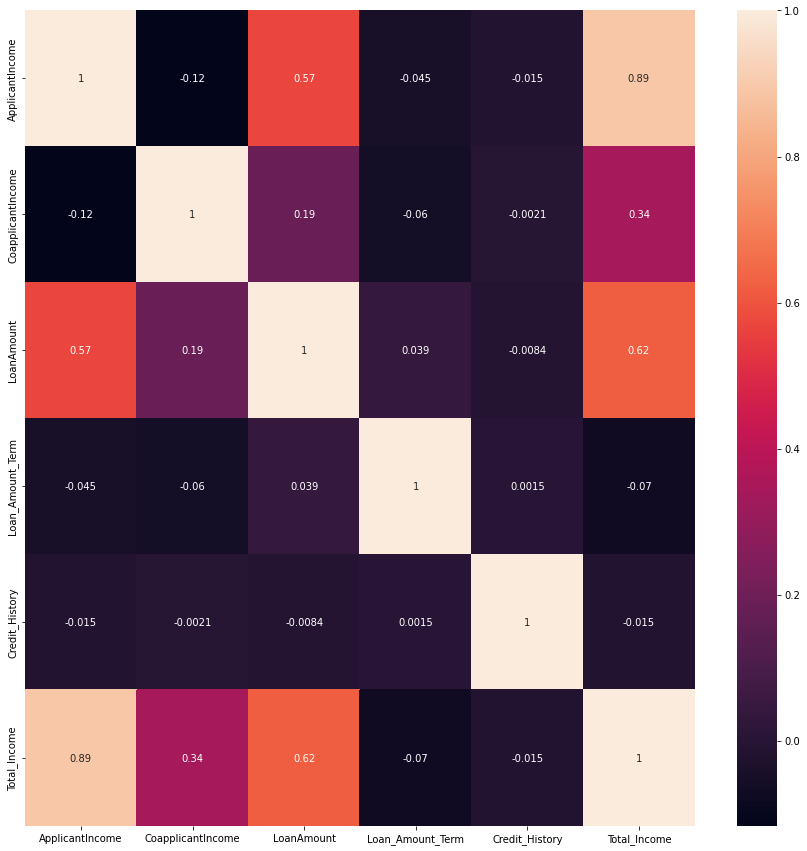

In [ ]:
#Finding the correlation between different attributes using heatmap
plt.figure(figsize=(15,15))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show

#Data Preproccessing

In [ ]:
#dataset=pd.concat([train_df,test_df])
dataset=train_df

In [ ]:
#Dropping loan id column
dataset.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
#Finding the number of missing values in each column
dataset.isnull().sum()

Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

In [ ]:
#Imputing missing values in categorical variables with the mode
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

In [ ]:
#Imputing The loan amount term missing values with the mode
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)

In [ ]:
#Imputing The loan amount missing values with the mode
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mode()[0], inplace=True)

In [ ]:
dataset.isnull().sum()

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

In [ ]:
#train_df=train_df.drop('Loan_ID',axis=1)
test_df=test_df.drop('Loan_ID',axis=1)

KeyError: ignored

In [ ]:
X = dataset.drop('Loan_Status',1)
y = dataset.Loan_Status

<ipython-input-391-d47f132f9ac7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dataset.drop('Loan_Status',1)


In [ ]:
X = pd.get_dummies(X)
dataset=pd.get_dummies(dataset)
test_df=pd.get_dummies(test_df)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

### Building a Model Using Logistic Regression

In [394]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

LogisticRegression()

In [395]:
#Checking the accuracy
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8054054054054054

In [397]:
#Accuracy on 10-fold cross validation on the training set.
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), x_cv, y_cv,cv=10)

array([0.78947368, 0.73684211, 0.84210526, 0.78947368, 0.84210526,
       0.77777778, 0.94444444, 0.83333333, 0.83333333, 0.72222222])

In [396]:
#Printing the classification report to check accuracy
from sklearn.metrics import classification_report
print(classification_report(y_cv, pred_cv))

              precision    recall  f1-score   support

           N       0.74      0.48      0.58        52
           Y       0.82      0.93      0.87       133

    accuracy                           0.81       185
   macro avg       0.78      0.71      0.73       185
weighted avg       0.80      0.81      0.79       185



### DECISION TREE

In [399]:
#Building a decision tree model
ModelDecisionTree = tree.DecisionTreeClassifier()
ModelDecisionTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [400]:
#Predicitng Values
Y_pred = ModelDecisionTree.predict(x_cv)

In [403]:
#Printing the classification report to check accuracy
print(classification_report(y_cv, Y_pred))

              precision    recall  f1-score   support

           N       0.51      0.52      0.51        52
           Y       0.81      0.80      0.81       133

    accuracy                           0.72       185
   macro avg       0.66      0.66      0.66       185
weighted avg       0.73      0.72      0.73       185

